In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

### (a) Find a root, to four decimal places, of the cubic equation $x^3 + 2x^2 − 7x − 1 = 0$

by rearranging it into the form $x = f (x) = \frac17 (x^3 + 2x^2 − 1)$ and
making a first guess between −3 and 1. 
Iterating this function $f$ gives a sequence of real numbers. Do they get closer to one another?

In [2]:
def cubic(x):
    return x**3 + 2*x**2 - 7*x - 1
def cubicprime(x):
    return 3*x**2 + 4*x - 7
def f(x):
    return (x**3 + 2 * x**2 - 1) / 7
def fprime(x):
    return (3*x**2 + 4*x)/7

In [3]:
'''
X is the array of start points.
f is the function we are trying to find a root of
f1 is the function which has the same fixed point
'''
def iterate(X, zero_of, iter_with):
    print(" x0 |      x_n        |       f(x)      |      cubic(x)    ")
    for x0 in X:
        sequence =[x0]
        x = x0
        c = 0
        while np.max(np.abs(zero_of(x))) > 1e-5:
            x=iter_with(x);
            sequence.append(x)
            c += 1
            if zero_of(x) > 1e5:
                break
        print(x0, x, iter_with(x), zero_of(x), '\n')
        plt.plot(sequence, label=x0)
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.legend()

 x0 |      x_n        |       f(x)      |      cubic(x)    
-3.0 -0.13780532489598873 -0.1378051929093054 9.239067835231651e-07 

-2.5 -0.13780392440701647 -0.13780529179346118 -9.571705112954021e-06 

-2.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

-1.5 -0.1378053267127113 -0.1378051927810317 9.375217573381889e-07 

-1.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

-0.5 -0.13780418057588997 -0.1378052737062429 -7.651912470429956e-06 

0.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

0.5 -0.13780530868272636 -0.13780519405407834 8.024005362372577e-07 

1.0 -0.13780470030291717 -0.13780523700998284 -3.756949459643444e-06 



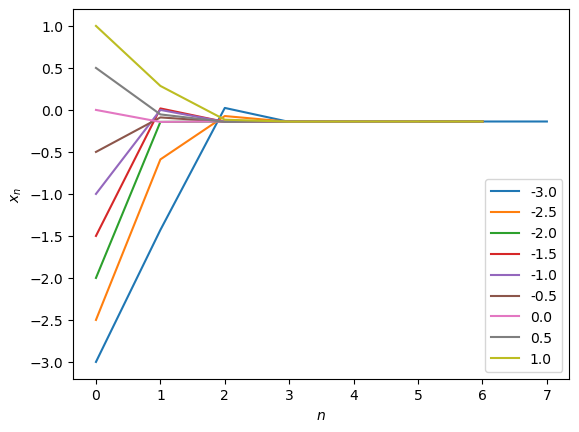

In [4]:
X = np.linspace(-3, 1, 9);
iterate(X, cubic, f)

In [5]:
approx_root = -0.13780;
print(cubic(approx_root), cubic(approx_root+1e-4), cubic(approx_root-1e-4))

-3.898215199993338e-05 -0.0007883896329998752 0.000710457060999925


#### We see that $x=-0.1378$ is the root between $-3$ and $1$, up to the first four digits.
#### As the plot above shows, the each sequence has elements getting closer to each other, since the jumps are getting smaller and smaller in amplitude from the left to the right.

### (b) Repeat the above exercise but now use an initial guess of 2 or more.
What happens in this case? Plot the cubic polynomial $x^3 + 2x^2 - 7x-1$ vs $x$ to explain the difference in behaviour.

 x0 |      x_n        |       f(x)      |      cubic(x)    
2.0 587.0250589985425 28996729.086833216 202972994.43241954 

3.0 46.62432319866722 15099.984515135206 105373.52134355577 

4.0 409.5718450645564 9862972.008512141 69037937.05666953 

5.0 2370.4893794252393 1904505646.797674 13331522934.158062 

6.0 10326.0 157319454075.2857 1101236106245.0 

7.0 62.857142857142854 36607.27072053311 255810.89504373175 

8.0 91.28571428571429 111050.92461474388 776717.4723032071 

9.0 127.14285714285714 298233.25989171176 2086742.8192419824 

10.0 171.28571428571428 726284.7438567262 5082794.2069970835 



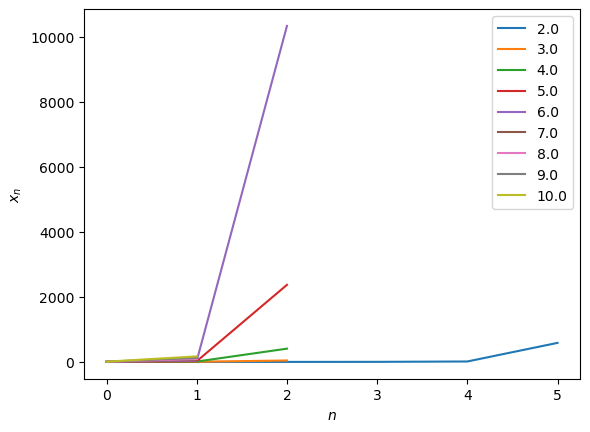

In [6]:
Y = np.linspace(2, 10, 9);
iterate(Y, cubic, f)

#### In this case we see that the sequence starts to blow up, at rates that are faster for larger initial values.
Please see the plot below.

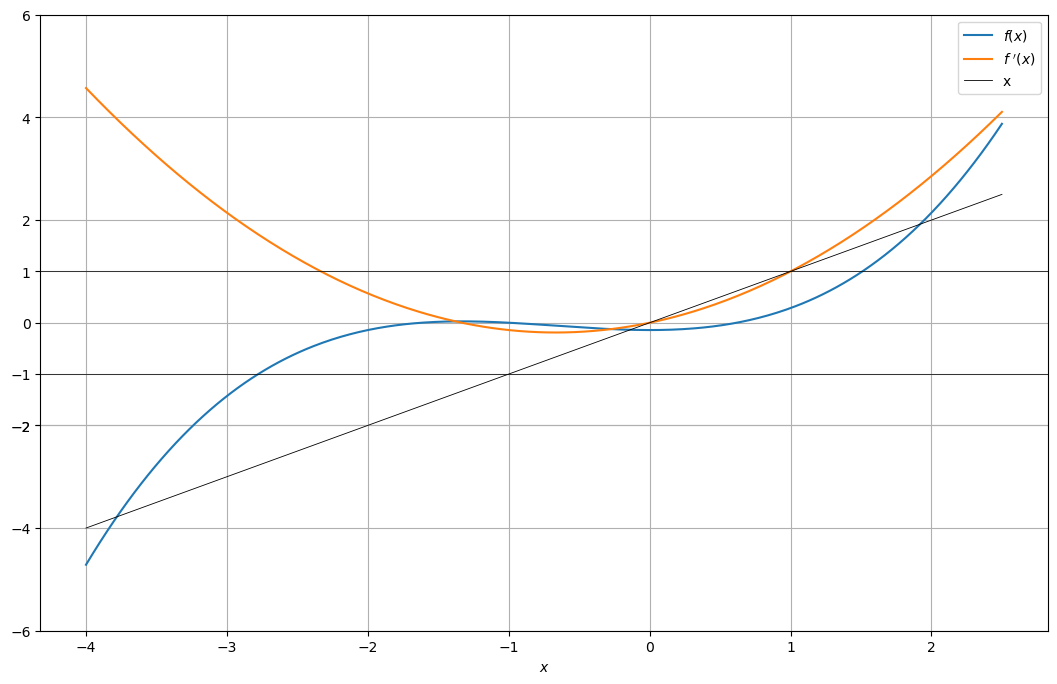

In [7]:
plt.figure(figsize=(13,8))

z = np.linspace(-4, 2.5, 400);
# plt.plot(z, cubic(z), label='$x^3 +2x^2-7x-1$')
# plt.plot(z, cubicprime(z), label="$3 X 2$")
plt.plot(z, f(z), label='$f(x)$')
plt.plot(z, fprime(z), label="$f\ '(x)$")
plt.plot(z, z, label='x', color='k', lw=0.6)

# Cosmetics
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1, -2])
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

In [8]:
f(-3), f(1)

(-1.4285714285714286, 0.2857142857142857)

In [9]:
z = np.linspace(-2, 0.5, 100);
np.max(np.abs(fprime(z)))

0.5714285714285714

In [10]:
f(-2), f(0.5)

(-0.14285714285714285, -0.05357142857142857)

#### Notice that $y=f$ and $y=x$ intersect before $x=-3$ and after $x=1$.
We see that \\[f([-3,1])\subset [-3,1].\\]
The metric space of real numbers is complete.
We have satisfied two hypotheses of the Banach contraction principle.

For $x\in[-2,0.5]$, we see that $-1 < -0.6 < f'(x) < 0.6 < 1$.
This implies that $f$ is a contraction on $[-2,0.5]$.

Closer inspection now reveals $f([-3,1]) \subset [-2, 0.5]$.
Also, $f[-2,0.5]\subset [-2,0.5]$, all the conditions of the theorem are satisfied:
1) $[-2,0.5]$ is a complete metric space.
2) $f$ maps this space to itself.
3) $f$ is a contraction on this space.

Hence we see that the iterates converge to the unique fixed point of $f$ in this space.

In fact, we see that there are two more fixed points of $f$: one around $-3.75$ and another just less than $2$.
Let us see whether this scheme converges to this same root when we begin inside this larger interval.

In [11]:
from scipy.optimize import bisect
bisect(lambda x: f(x) - x, -4, -3)
# This gives us the fixed point of f lying in (-4,-3)

-3.781283795977288

 x0 |      x_n        |       f(x)      |      cubic(x)    
-3.7813 -inf nan nan 

-3.781290909090909 -1.8176424752407905e+207 nan nan 

-3.781281818181818 -0.1378047690652074 -0.13780523215488866 -3.241627768879596e-06 

-3.7812727272727273 -0.1378053159521458 -0.13780519354080506 8.568793852248291e-07 

-3.7812636363636365 -0.1378053264188604 -0.1378051928017797 9.353195649097756e-07 

-3.7812545454545456 -0.1378045561229283 -0.1378052471900821 -4.837470076735073e-06 

-3.7812454545454544 -0.13780489430480652 -0.13780522331209966 -2.303051051866234e-06 

-3.7812363636363635 -0.13780532823506758 -0.13780519267354238 9.489306764809413e-07 

-3.7812272727272727 -0.13780532446744445 -0.1378051929395637 9.206951652185325e-07 

-3.781218181818182 -0.13780532608797447 -0.13780519282514261 9.32839822942455e-07 

-3.781209090909091 -0.13780532900770834 -0.1378051926189884 9.54721039558848e-07 

-3.7812 -0.1378053220555282 -0.13780519310986233 9.026196610140147e-07 



/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/554160604.py:2: RuntimeWarning: overflow encountered in scalar power
  return x**3 + 2*x**2 - 7*x - 1
/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/554160604.py:6: RuntimeWarning: overflow encountered in scalar power
  return (x**3 + 2 * x**2 - 1) / 7
/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/554160604.py:2: RuntimeWarning: invalid value encountered in scalar add
  return x**3 + 2*x**2 - 7*x - 1
/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/554160604.py:6: RuntimeWarning: invalid value encountered in scalar add
  return (x**3 + 2 * x**2 - 1) / 7


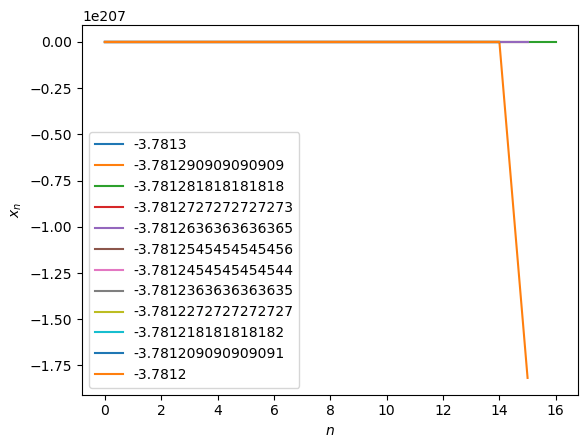

In [12]:
X = np.linspace(-3.7813, -3.7812, 12);
iterate(X, cubic, f)

#### It's seems to be the case that this fixed point is indeed the lowest we can go and still converge.

In [13]:
bisect(lambda x: f(x) -x, 1,2)

1.919088997592553

 x0 |      x_n        |       f(x)      |      cubic(x)    
1.919 -0.13780444265824326 -0.137805255201463 -5.687802538067999e-06 

1.9190909090909092 2105.6885178940643 1335047283.7527256 9345316246.449453 

1.919181818181818 1433.7817583785416 421654260.10705966 2951569784.277109 

1.9192727272727272 236.9812932829172 1917317.1861083298 13419561.433705328 

1.9193636363636364 3035.6865262738465 3999067742.1398506 27993452945.17327 

1.9194545454545455 66.34100999189778 42968.09177574325 300312.25536025944 

1.9195454545454544 165.6954122410108 657724.4930659488 4602911.583575955 

1.9196363636363636 421.3135525832392 10734331.077478752 75137368.34748317 

1.9197272727272727 1089.3738476088788 185024565.22929043 1295164330.9880996 

1.9198181818181819 2860.2995029112667 3345338405.314525 23417348815.105156 

1.9199090909090908 7615.478435074932 63111365775.606026 441779507120.8931 

1.92 51.725069669238685 20534.214509071873 143377.42607581845 



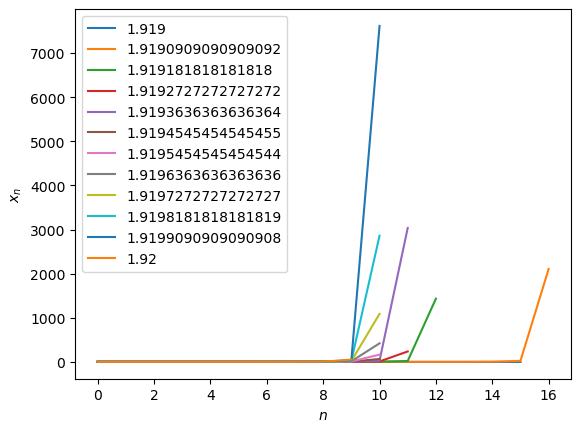

In [14]:
X = np.linspace(1.919, 1.92, 12)
iterate(X, cubic, f)
# Notice how the sequences fail to converge as soon as x0 steps over 1.91908

#### And the same is happening on the other side: that fixed point is the highest we can go without diverging.

#### We have thus verified that this scheme converges to the root near $0$ iff the $x_0$ is between the two other unstable fixed points of $f$ on either sides of this root.

#### This is because $f'(x) > 0\implies f(x+\epsilon) > f(x)\forall \epsilon > 0$ and small.
Hence the sequence is increasing for any $x_0 = -0.1378+\epsilon$ and decreasing for any $x_0 = 1.9190 - \epsilon$.
Although $f'(x) < 0$ in a smaller interval inside $[-3,1]$, $f'(x_n) < 0\implies x_n\in[-3,1]$ and hence by the above reasoning it must converge.

When we choose a point outside the interval bounded by the two _unstable_ fixed points, we see that the reverse happens.
$f'(x_n) > 0 \implies f(x-\epsilon) < f(x)$ and the sequence diverges.

#### For $x\ge2$, $f(x)\ge2$, and in fact, $f$ is increasing on $[2, \infty)$, so the sequence blows up.

In [15]:
def f2(x):
    return np.sqrt((0.5 * (-x**3 + 7*x + 1)))
def f2prime(x):
    return 0.25 * (-3 * x**2 + 7) / f2(x)
def discriminant(x):
    return 7*x + 1 - x**3

In [16]:
print(bisect(discriminant, 2, 3), bisect(discriminant, -1, 0), bisect(discriminant, -3, -2))

2.7144787443885434 -0.1432773218384682 -2.5712014225482562


#### These are the points where $-x^3 + 7x + 1 = 0$. We know it is goes to $+\infty$ as $x\to -\infty$ and becomes negative as $x\to +\infty$.
#### $\therefore f_2$ is only defined on $(-\infty, -2.5712] \cup [-0.1432, 2.71447]$ (approximately).

 x0 |      x_n        |       f(x)      |      cubic(x)    
-0.1433 nan nan nan 

-0.00695238095238096 1.9190885056672178 1.9190892570459908 -5.767850595361779e-06 

0.1293952380952381 1.9190884247591293 1.9190892997189286 -6.71650242267674e-06 

0.26574285714285717 1.9190882790653971 1.9190893765613986 -8.424769259107734e-06 

0.4020904761904762 1.9190885282318146 1.9190892451448598 -5.503279430385533e-06 

0.5384380952380953 1.9190884457258035 1.9190892886605844 -6.470667013758202e-06 

0.6747857142857143 1.919088494476351 1.919089262948333 -5.899064136727361e-06 

0.8111333333333334 1.9190897004968976 1.919088626861855 8.24160550472186e-06 

0.9474809523809524 1.9190882899611112 1.9190893708147312 -8.297016435676596e-06 

1.0838285714285716 1.9190894571395007 1.9190887552150429 5.388222321656144e-06 

1.2201761904761905 1.919089478489591 1.9190887439544393 5.63855364710264e-06 

1.3565238095238095 1.9190885417416566 1.9190892380194315 -5.34487576864251e-06 

1.4928714285714286 1.919

/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/2318728443.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((0.5 * (-x**3 + 7*x + 1)))


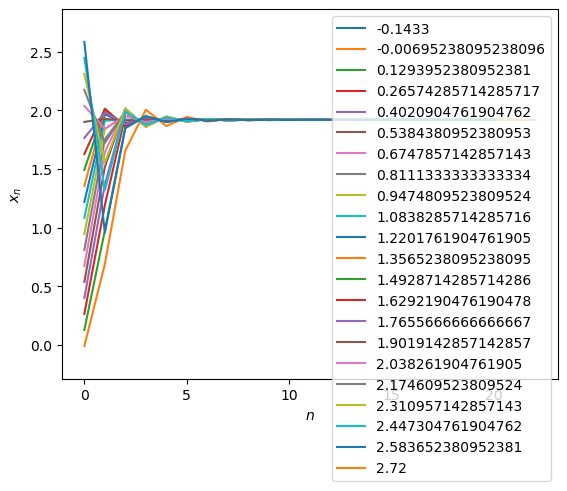

In [17]:
Z = np.linspace(-0.1433, 2.72, 22)
iterate(Z, cubic, f2)

Notice how the iterates are oscillating, unlike previous examples.

/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/2318728443.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((0.5 * (-x**3 + 7*x + 1)))


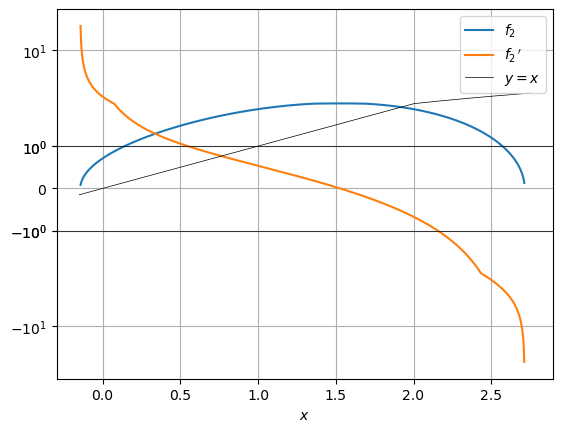

In [18]:
z = np.linspace(-0.15, 2.75, 1000)
plt.plot(z, f2(z), label='$f_2$')
plt.plot(z, f2prime(z), label='$f_2\,\'$')
plt.plot(z, z, label='$y=x$', color='k', lw=0.5)
# Cosmetics
plt.yscale('symlog')
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1])
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

#### A similar reasoning applies here.
The line $y=x$ intersects $y=f_2(x)$ in this interval.
So $f_2$ has a fixed point $x^*$, which we see is near $2$.

In [19]:
bisect(f2prime, 1,2)

1.5275252316514525

In [20]:
f2(1.5275)

2.0159924451898377

Also, from the above two lines we see on this interval $f_2$ is minimum on the endpoints, and $f_2\le 2.5$.
On the left side, $f_2(x) > x$, and on the right $f_2(x) < x.$
This means that $f_2$ maps this interval into approximately $[0, 2.1]$.

The line $y=x$ intersects the graph of $f_2$, so it has a fixed point $x^\ast$, which we see is near $2$.  
Looking at the graph of $f_2'(x)$, we see that it has modulus $<1$ between approximately $[0.5, 2.2]$.
Now $f_2([0.5, 2.2])$ is obviously bounded above by $2.016$, which is less that $2.2$.
It is bounded below by $1$, as clearly seen from the graph.

Thus $f_2$ is a contraction on $[0.5, 2.2]$ and so the iterates beginning from this interval converge to $x^\ast\approx 1.9$.

Outside this interval, on the left-hand side, the function is increasing, so it takes the sequence into the interval.
On the right, the function is decreasing, so the same thing happens.

### Left interval

Here, the function is positive until it hits zero on the right endpoint.
But the right endpoint is negative, so this interval has no fixed points.

Yet, a few points do actually converge.

/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/2318728443.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((0.5 * (-x**3 + 7*x + 1)))


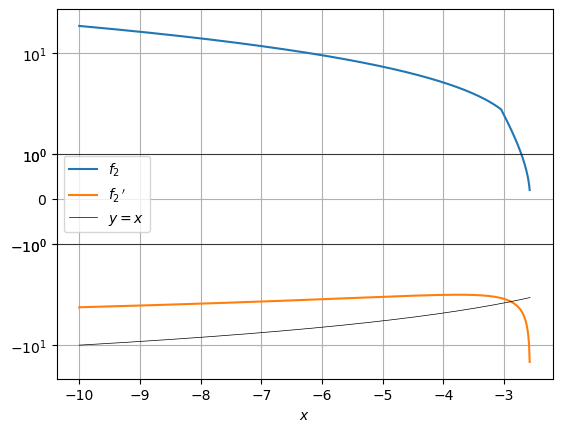

In [21]:
z = np.linspace(-10, -2.57, 1000)
plt.plot(z, f2(z), label='$f_2$')
plt.plot(z, f2prime(z), label='$f_2\,\'$')
plt.plot(z, z, label='$y=x$', color='k', lw=0.5)
# Cosmetics
plt.yscale('symlog')
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1])
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

 x0 |      x_n        |       f(x)      |      cubic(x)    
-10.0 nan nan nan 

-9.608947368421052 nan nan nan 

-9.217894736842105 nan nan nan 

-8.826842105263157 nan nan nan 

-8.43578947368421 nan nan nan 

-8.044736842105262 nan nan nan 

-7.653684210526316 nan nan nan 

-7.262631578947369 nan nan nan 

-6.8715789473684215 nan nan nan 

-6.480526315789474 nan nan nan 

-6.089473684210526 nan nan nan 

-5.698421052631579 nan nan nan 

-5.307368421052631 nan nan nan 

-4.916315789473684 nan nan nan 

-4.525263157894737 nan nan nan 

-4.13421052631579 nan nan nan 

-3.743157894736842 nan nan nan 

-3.3521052631578945 nan nan nan 

-2.961052631578947 1.9190896595151745 1.9190886484767167 7.761091753266669e-06 

-2.57 nan nan nan 



/var/folders/c1/17hl71955bz3vn6sz64ld7180000gn/T/ipykernel_89483/2318728443.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((0.5 * (-x**3 + 7*x + 1)))


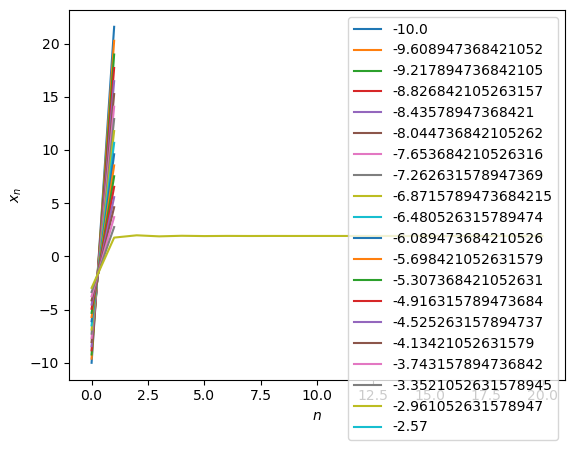

In [22]:
X = np.linspace(-10, -2.57, 20)
iterate(X, cubic, f2)

#### This convergence is explained by the fact that $f_2(x_0)$ is always positive, and hence either falls in the earlier interval (which allows it to converge), or falls out of its domain.